In [1]:
import warnings
#from text_unidecode import unidecode
from collections import deque



import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from node2vec import Node2Vec

sns.set_style('whitegrid')

In [2]:
import pandas as pd
import numpy as np

data = pd.read_excel("KG_500_ProperRelations.xlsx")
data

,Company,Industry,Sector,Associated_Concept0,Associated_Concept1,Associated_Concept2,Associated_Concept3,Associated_Concept4,Associated_Concept5,Associated_Concept6,Associated_Concept7,Associated_Concept8,Associated_Concept9,Associated_Concept10
0,OMC,Communication Services,Advertising,NaN,Marketing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IPG,Communication Services,Advertising,NaN,Marketing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HHS,Communication Services,Advertising,NaN,Marketing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CTL,Communication Services,Alternative Carriers,NaN,Optical Fibre Networks,Data Services,Ethernet,Television,IT Services,Broadband,Internet,Cloud Services,NaN,NaN
4,LBTYA,Communication Services,Alternative Carriers,NaN,Broadband,Internet,Wi-Fi,Television,Cloud Services,Data Services,NaN,NaN,NaN,NaN
5,CCOI,Communication Services,Alternative Carriers,NaN,Internet,Data Services,Ethernet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,DISCA,Communication Services,Broadcasting,Entertainment,Television,Content Producer,Streaming Service,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,VIAC,Communication Services,Broadcasting,Entertainment,Television,News,Content Producer,Steaming Service,Books,NaN,NaN,NaN,NaN,NaN
8,GTN,Communication Services,Broadcasting,Entertainment,Television,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NXST,Communication Services,Broadcasting,Entertainment,Television,Advertising,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data = data.replace(np.nan,0)
data

,Company,Industry,Sector,Associated_Concept0,Associated_Concept1,Associated_Concept2,Associated_Concept3,Associated_Concept4,Associated_Concept5,Associated_Concept6,Associated_Concept7,Associated_Concept8,Associated_Concept9,Associated_Concept10
0,OMC,Communication Services,Advertising,0,Marketing,0,0,0,0,0,0,0,0,0
1,IPG,Communication Services,Advertising,0,Marketing,0,0,0,0,0,0,0,0,0
2,HHS,Communication Services,Advertising,0,Marketing,0,0,0,0,0,0,0,0,0
3,CTL,Communication Services,Alternative Carriers,0,Optical Fibre Networks,Data Services,Ethernet,Television,IT Services,Broadband,Internet,Cloud Services,0,0
4,LBTYA,Communication Services,Alternative Carriers,0,Broadband,Internet,Wi-Fi,Television,Cloud Services,Data Services,0,0,0,0
5,CCOI,Communication Services,Alternative Carriers,0,Internet,Data Services,Ethernet,0,0,0,0,0,0,0
6,DISCA,Communication Services,Broadcasting,Entertainment,Television,Content Producer,Streaming Service,0,0,0,0,0,0,0
7,VIAC,Communication Services,Broadcasting,Entertainment,Television,News,Content Producer,Steaming Service,Books,0,0,0,0,0
8,GTN,Communication Services,Broadcasting,Entertainment,Television,0,0,0,0,0,0,0,0,0
9,NXST,Communication Services,Broadcasting,Entertainment,Television,Advertising,0,0,0,0,0,0,0,0


In [4]:
# Industry, Sector Relations
# Industry, Sector Relations
industry_sector_list = []
for row in data.values:
    industry_sector_list.append([row[1], row[2]])
    
print("Length industry_sector_list:", len(industry_sector_list))
  
industry_sector_set = []
for element in industry_sector_list:
    if element in industry_sector_set:
        pass
    else:
        industry_sector_set.append(element)
        
print("industry_sector_list", len(industry_sector_set))
industry_sector_set

Length industry_sector_list: 500
industry_sector_list 117


[['Communication Services', 'Advertising'],
 ['Communication Services', 'Alternative Carriers'],
 ['Communication Services', 'Broadcasting'],
 ['Communication Services', 'Cable and Satellite'],
 ['Communication Services', 'Integrated Telecommunication Services'],
 ['Communication Services', 'Interactive Home Entertainment'],
 ['Communication Services', 'Interactive Media and Services'],
 ['Communication Services', 'Movies and Entertainment'],
 ['Communication Services', 'Publishing'],
 ['Communication Services', 'Wireless Telecommunication Services'],
 ['Consumer Discretionary', 'Apparel Retail'],
 ['Consumer Discretionary', 'Apparel, Accessories and Luxury Goods'],
 ['Consumer Discretionary', 'Auto Parts and Equipment'],
 ['Consumer Discretionary', 'Automobile Manufacturers'],
 ['Consumer Discretionary', 'Automotive Retail'],
 ['Consumer Discretionary', 'Casinos and Gaming'],
 ['Consumer Discretionary', 'Consumer Electronics'],
 ['Consumer Discretionary', 'Department Stores'],
 ['Cons

In [5]:
# Sector, Company Relations
# Industry, Sector Relations
# Industry, Sector Relations
sector_company_list = []
for row in data.values:
    sector_company_list.append([row[2], row[0]])
    
print("Length industry_sector_list:", len(sector_company_list))
  
sector_company_set = []
for element in sector_company_list:
    if element in sector_company_set:
        pass
    else:
        sector_company_set.append(element)
        
print("industry_sector_list", len(sector_company_set))
sector_company_set

Length industry_sector_list: 500
industry_sector_list 500


[['Advertising', 'OMC'],
 ['Advertising', 'IPG'],
 ['Advertising', 'HHS'],
 ['Alternative Carriers', 'CTL'],
 ['Alternative Carriers', 'LBTYA'],
 ['Alternative Carriers', 'CCOI'],
 ['Broadcasting', 'DISCA'],
 ['Broadcasting', 'VIAC'],
 ['Broadcasting', 'GTN'],
 ['Broadcasting', 'NXST'],
 ['Broadcasting', 'TGNA'],
 ['Broadcasting', 'SSP'],
 ['Cable and Satellite', 'CMCSA'],
 ['Cable and Satellite', 'DISH'],
 ['Cable and Satellite', 'SJR'],
 ['Cable and Satellite', 'SIRI'],
 ['Integrated Telecommunication Services', 'T'],
 ['Integrated Telecommunication Services', 'VZ'],
 ['Integrated Telecommunication Services', 'KT'],
 ['Integrated Telecommunication Services', 'TELNY'],
 ['Integrated Telecommunication Services', 'ATNI'],
 ['Integrated Telecommunication Services', 'TU'],
 ['Integrated Telecommunication Services', 'ORAN'],
 ['Interactive Home Entertainment', 'ATVI'],
 ['Interactive Home Entertainment', 'EA'],
 ['Interactive Home Entertainment', 'TTWO'],
 ['Interactive Home Entertainment'

In [6]:
# Company, Concept Relations
company_concept_list = []
for row in data.values:
    for i in range(3, len(row)):
        #print(i)
        if row[i] == 0:
            pass
        else:
            company_concept_list.append([row[0], row[i]])
    
print(len(company_concept_list))
company_concept_list

888


[['OMC', 'Marketing'],
 ['IPG', 'Marketing'],
 ['HHS', 'Marketing'],
 ['CTL', 'Optical Fibre Networks'],
 ['CTL', 'Data Services'],
 ['CTL', 'Ethernet'],
 ['CTL', 'Television'],
 ['CTL', 'IT Services'],
 ['CTL', 'Broadband'],
 ['CTL', 'Internet'],
 ['CTL', 'Cloud Services'],
 ['LBTYA', 'Broadband'],
 ['LBTYA', 'Internet'],
 ['LBTYA', 'Wi-Fi'],
 ['LBTYA', 'Television'],
 ['LBTYA', 'Cloud Services'],
 ['LBTYA', 'Data Services'],
 ['CCOI', 'Internet'],
 ['CCOI', 'Data Services'],
 ['CCOI', 'Ethernet'],
 ['DISCA', 'Entertainment'],
 ['DISCA', 'Television'],
 ['DISCA', 'Content Producer'],
 ['DISCA', 'Streaming Service'],
 ['VIAC', 'Entertainment'],
 ['VIAC', 'Television'],
 ['VIAC', 'News'],
 ['VIAC', 'Content Producer'],
 ['VIAC', 'Steaming Service'],
 ['VIAC', 'Books'],
 ['GTN', 'Entertainment'],
 ['GTN', 'Television'],
 ['NXST', 'Entertainment'],
 ['NXST', 'Television'],
 ['NXST', 'Advertising'],
 ['TGNA', 'Entertainment'],
 ['TGNA', 'Television'],
 ['TGNA', 'Radio'],
 ['TGNA', 'Adverti

In [7]:
# Additional Related Concept relations
additional_relations = [['Consumer Electronics', 'Hardware'], ['Mortgage Services', 'Financials'],
                       ['Vehicles', 'Diesel'], ['Vehicles', 'Gasoline'], ['Life and Health Insurance', 'Healthcare'],
                        ['Property and Casualty Insurance', 'Home'], ['Electric Utilities', 'Renewable Energy'],
                        ['Agricultural Products', 'Agriculture'], ['Restaurants', 'Food'], ['Agriculture', 'Food'],
                       ['Womens Apparel', 'Apparel'], ['Water', 'Food'], ['Precious Metals', 'Metal'],
                       ['Video Games', 'Entertainment'], ['Music', 'Entertainment'], ['Films', 'Entertainment']]

In [8]:
source_target_df = pd.DataFrame(industry_sector_set + sector_company_set + company_concept_list + additional_relations
                                , columns = ['Source', 'Target'])
source_target_df

,Source,Target
0,Communication Services,Advertising
1,Communication Services,Alternative Carriers
2,Communication Services,Broadcasting
3,Communication Services,Cable and Satellite
4,Communication Services,Integrated Telecommunication Services
5,Communication Services,Interactive Home Entertainment
6,Communication Services,Interactive Media and Services
7,Communication Services,Movies and Entertainment
8,Communication Services,Publishing
9,Communication Services,Wireless Telecommunication Services


C:\Users\conor\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\conor\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


<function matplotlib.pyplot.show(*args, **kw)>

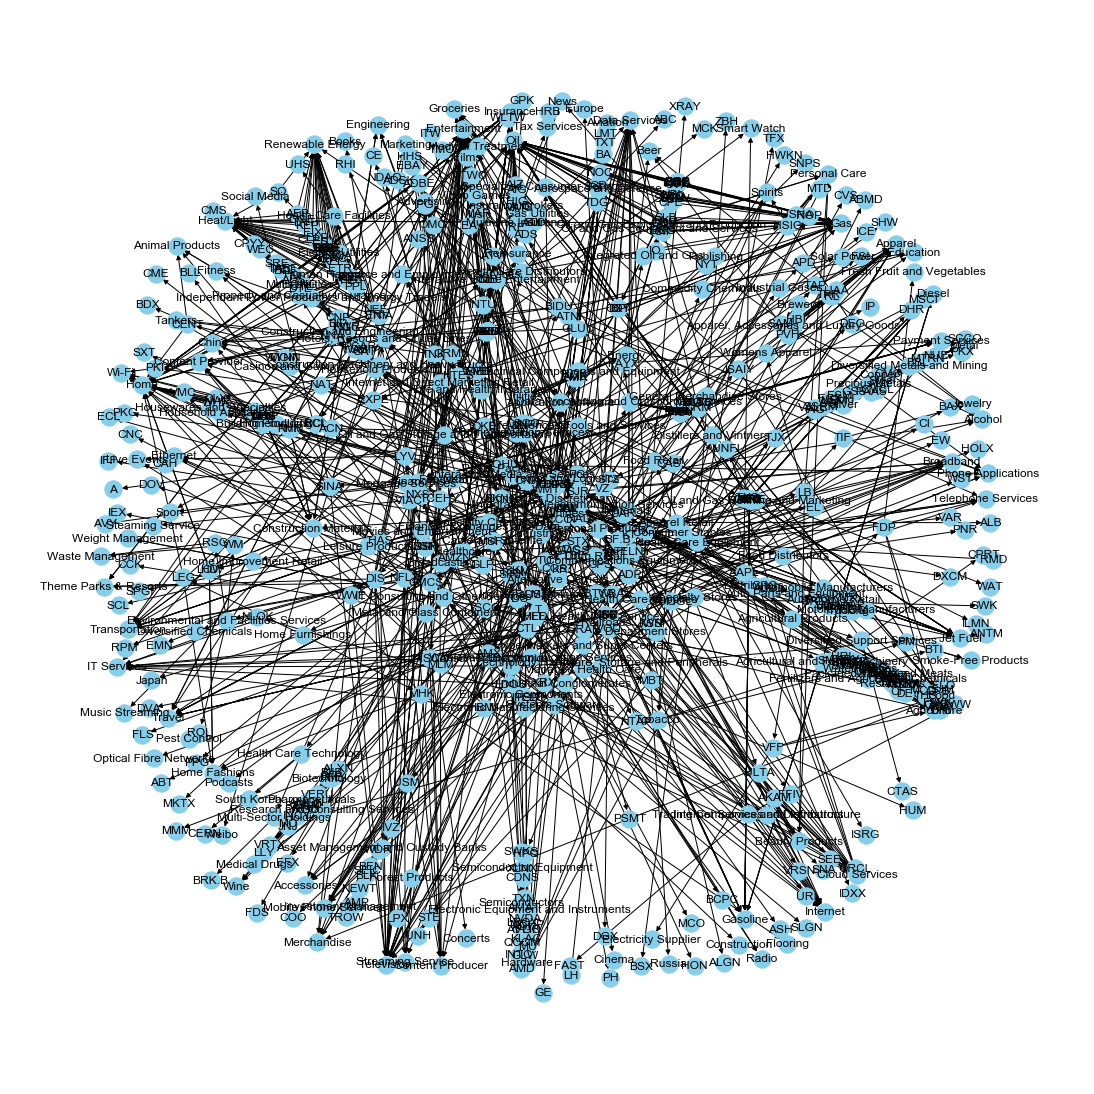

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

kg_df = pd.DataFrame({'source': source_target_df['Source'], 'target': source_target_df['Target'], 
                      'edge': source_target_df['Target']})
G = nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr = True, create_using = nx.MultiDiGraph())
plt.figure(figsize = (15,15))
pos = nx.spring_layout(G)
nx.draw(G, with_labels = True, node_color = 'skyblue', edge_cmap = plt.cm.Blues, pos = pos)
plt.show

In [10]:
node2vec = Node2Vec(G, dimensions=9, walk_length=20, num_walks=500, workers=2)

Computing transition probabilities: 100%|██████████████████████████████████████████| 716/716 [00:00<00:00, 9944.08it/s]


In [11]:
model = node2vec.fit(window=10, min_count=1)

In [12]:
model.wv.vocab

{'BF.B': <gensim.models.keyedvectors.Vocab at 0x1fee997e2b0>,
 'Wine': <gensim.models.keyedvectors.Vocab at 0x1feef364780>,
 'CERN': <gensim.models.keyedvectors.Vocab at 0x1feef3647f0>,
 'Building Products': <gensim.models.keyedvectors.Vocab at 0x1feef3647b8>,
 'TT': <gensim.models.keyedvectors.Vocab at 0x1feef364860>,
 'Construction and Engineering': <gensim.models.keyedvectors.Vocab at 0x1feef364898>,
 'PWR': <gensim.models.keyedvectors.Vocab at 0x1feef3648d0>,
 'Construction Materials': <gensim.models.keyedvectors.Vocab at 0x1feef364908>,
 'MLM': <gensim.models.keyedvectors.Vocab at 0x1feef364940>,
 'Construction': <gensim.models.keyedvectors.Vocab at 0x1feef364978>,
 'PH': <gensim.models.keyedvectors.Vocab at 0x1feef3649b0>,
 'EFX': <gensim.models.keyedvectors.Vocab at 0x1feef3649e8>,
 'PSMT': <gensim.models.keyedvectors.Vocab at 0x1feef364a20>,
 'Merchandise': <gensim.models.keyedvectors.Vocab at 0x1feef364a58>,
 'Tobacco': <gensim.models.keyedvectors.Vocab at 0x1feef364a90>,
 'BT

In [13]:
all_nodes = [x for x in model.wv.vocab]
all_embeddings = np.array([model.wv[x] for x in all_nodes])
company_nodes = data['Company'].tolist()
company_embeddings = np.array([model.wv[x] for x in data['Company'].tolist()])

In [14]:
print(all_nodes)

['BF.B', 'Wine', 'CERN', 'Building Products', 'TT', 'Construction and Engineering', 'PWR', 'Construction Materials', 'MLM', 'Construction', 'PH', 'EFX', 'PSMT', 'Merchandise', 'Tobacco', 'BTI', 'Smoke-Free Products', 'Concerts', 'Oil and Gas Storage and Transportation', 'EPD', 'Transportation', 'TU', 'Internet', 'IT', 'Electronic Equipment and Instruments', 'FLIR', 'Hardware', 'ALXN', 'Medical Drugs', 'UPS', 'Aviation', 'BWA', 'Vehicles', 'Gasoline', 'Oil and Gas Refining and Marketing', 'PEIX', 'Jet Fuel', 'Interactive Media and Services', 'SOHU', 'Content Provider', 'STKL', 'Food', 'NOV', 'Gas', 'GPC', 'Auto Parts and Equipment', 'Diesel', 'Brewers', 'SAM', 'Beer', 'AAP', 'CHD', 'Home', 'ALB', 'ODFL', 'SJI', 'Heat/Light', 'WAT', 'Russia', 'TTWO', 'Entertainment', 'Air Freight and Logistics', 'Gold', 'AGI', 'Precious Metals', 'Metal', 'KSS', 'Apparel', 'AOS', 'J', 'Engineering', 'DRI', 'SHW', 'TAC', 'Diversified Chemicals', 'EMN', 'STC', 'Insurance', 'Specialty Chemicals', 'CE', 'UNFI

In [15]:
print(all_embeddings)

[[ 0.02729947 -0.38765183 -2.951358   ... -0.89854574 -0.8187359
   2.2321496 ]
 [ 2.7649486   0.6138063   1.7065833  ... -1.5815618  -0.20603973
   2.3472245 ]
 [ 0.9760337   1.6714206   1.3514227  ...  4.8060846   3.3115015
   0.86943173]
 ...
 [-0.579657   -0.4454019   0.576717   ... -2.9098508   4.566341
   0.5886318 ]
 [-0.745734    0.55281883 -0.10463279 ... -0.67735153  1.799454
  -0.5428155 ]
 [ 0.2810009  -1.1970347  -1.6557192  ... -0.1805856   0.6847421
   0.696593  ]]


In [16]:
company_embeddings_list = []
for company in data['Company'].tolist():
    index = all_nodes.index(company)
    emb = all_embeddings[index]
    company_embeddings_list.append([company, emb])
    
company_embeddings_list

[['OMC', array([ 3.4077466, -0.3092468, -1.4919312, -3.1883843,  1.8019917,
         -1.805728 , -3.1474624,  4.761229 , -4.011853 ], dtype=float32)],
 ['IPG',
  array([ 3.3067298 , -0.41698593, -1.7954537 , -3.1027224 ,  1.9061977 ,
         -1.8801372 , -3.147812  ,  4.860892  , -4.0724154 ], dtype=float32)],
 ['HHS',
  array([ 3.4590383 , -0.33954287, -1.5551766 , -3.1502573 ,  1.7978593 ,
         -1.9398844 , -3.05268   ,  4.8580565 , -4.046183  ], dtype=float32)],
 ['CTL',
  array([ 0.91227436,  0.96606374,  1.3433892 ,  3.000792  ,  2.7017555 ,
         -0.84548205, -2.6361413 ,  3.5325756 , -0.9193332 ], dtype=float32)],
 ['LBTYA',
  array([ 1.0904567 ,  0.39622682,  0.48113182,  2.7863345 ,  2.8554647 ,
         -0.7042277 , -3.3257766 ,  3.3386686 , -0.39144418], dtype=float32)],
 ['CCOI', array([ 0.7825201, -0.0052829,  0.038662 ,  2.7708888,  3.6012824,
         -1.4714344, -2.2562168,  3.355532 , -1.0730945], dtype=float32)],
 ['DISCA',
  array([ 0.09542993,  2.0453665 , -

In [17]:
for element in company_embeddings_list:
    if element[0] == 'BF.B':
        print(element)

['BF.B', array([ 0.02729947, -0.38765183, -2.951358  ,  1.6401856 ,  2.5758657 ,
        2.7158744 , -0.89854574, -0.8187359 ,  2.2321496 ], dtype=float32)]


In [19]:
final_list = []
for element in company_embeddings_list:
    company_plus_emb = [element[0], element[1][0], element[1][1], element[1][2], element[1][3], element[1][4],
                       element[1][5], element[1][6], element[1][7], element[1][8]]
    final_list.append(company_plus_emb)
    
final_list

[['OMC',
  3.4077466,
  -0.3092468,
  -1.4919312,
  -3.1883843,
  1.8019917,
  -1.805728,
  -3.1474624,
  4.761229,
  -4.011853],
 ['IPG',
  3.3067298,
  -0.41698593,
  -1.7954537,
  -3.1027224,
  1.9061977,
  -1.8801372,
  -3.147812,
  4.860892,
  -4.0724154],
 ['HHS',
  3.4590383,
  -0.33954287,
  -1.5551766,
  -3.1502573,
  1.7978593,
  -1.9398844,
  -3.05268,
  4.8580565,
  -4.046183],
 ['CTL',
  0.91227436,
  0.96606374,
  1.3433892,
  3.000792,
  2.7017555,
  -0.84548205,
  -2.6361413,
  3.5325756,
  -0.9193332],
 ['LBTYA',
  1.0904567,
  0.39622682,
  0.48113182,
  2.7863345,
  2.8554647,
  -0.7042277,
  -3.3257766,
  3.3386686,
  -0.39144418],
 ['CCOI',
  0.7825201,
  -0.005282896,
  0.038662,
  2.7708888,
  3.6012824,
  -1.4714344,
  -2.2562168,
  3.355532,
  -1.0730945],
 ['DISCA',
  0.09542993,
  2.0453665,
  -0.434509,
  0.57343787,
  0.71405303,
  1.3158402,
  -4.4945507,
  2.8027732,
  0.7083228],
 ['VIAC',
  1.5247127,
  0.95729345,
  -0.119012766,
  -1.2906382,
  0.4112

In [20]:
company_emb_df = pd.DataFrame(final_list, columns = ['Company', 'Embedding_Dim0', 'Embedding_Dim1', 'Embedding_Dim2', 'Embedding_Dim3', 'Embedding_Dim4', 'Embedding_Dim5', 'Embedding_Dim6','Embedding_Dim7', 'Embedding_Dim8'])
company_emb_df                   

,Company,Embedding_Dim0,Embedding_Dim1,Embedding_Dim2,Embedding_Dim3,Embedding_Dim4,Embedding_Dim5,Embedding_Dim6,Embedding_Dim7,Embedding_Dim8
0,OMC,3.407747,-0.309247,-1.491931,-3.188384,1.801992,-1.805728,-3.147462,4.761229,-4.011853
1,IPG,3.306730,-0.416986,-1.795454,-3.102722,1.906198,-1.880137,-3.147812,4.860892,-4.072415
2,HHS,3.459038,-0.339543,-1.555177,-3.150257,1.797859,-1.939884,-3.052680,4.858057,-4.046183
3,CTL,0.912274,0.966064,1.343389,3.000792,2.701756,-0.845482,-2.636141,3.532576,-0.919333
4,LBTYA,1.090457,0.396227,0.481132,2.786335,2.855465,-0.704228,-3.325777,3.338669,-0.391444
5,CCOI,0.782520,-0.005283,0.038662,2.770889,3.601282,-1.471434,-2.256217,3.355532,-1.073094
6,DISCA,0.095430,2.045367,-0.434509,0.573438,0.714053,1.315840,-4.494551,2.802773,0.708323
7,VIAC,1.524713,0.957293,-0.119013,-1.290638,0.411283,2.482966,-4.427758,2.387131,0.377238
8,GTN,0.394691,1.076086,-0.707233,0.469484,1.245199,1.366774,-4.181526,2.088947,0.656501
9,NXST,1.659982,1.692786,-1.008086,0.494413,0.646701,1.025402,-4.186104,2.606515,-0.448728


In [21]:
company_emb_df = company_emb_df.sort_values(['Company'])
company_emb_df

,Company,Embedding_Dim0,Embedding_Dim1,Embedding_Dim2,Embedding_Dim3,Embedding_Dim4,Embedding_Dim5,Embedding_Dim6,Embedding_Dim7,Embedding_Dim8
277,A,0.833475,-0.807255,0.619884,1.032642,0.502529,1.068361,1.461865,2.622370,0.292843
365,AAL,-0.332444,1.579816,-1.087425,-2.914494,2.751698,-1.121777,0.347746,-1.309849,-0.457140
57,AAP,0.973889,1.215107,1.252446,-1.342875,2.837703,1.819841,1.335781,-1.930520,-1.865711
346,AAPL,1.099789,0.118153,1.807061,0.047440,-0.668449,-1.700716,0.551890,3.349237,1.939776
245,ABC,1.095932,-0.874084,-0.009697,1.137349,0.953655,1.422977,2.114337,2.056575,-0.252892
250,ABMD,0.429187,0.039022,-0.248984,0.297064,0.222644,0.586677,1.012857,1.173039,0.056225
249,ABT,0.369410,0.075472,-0.198352,0.240812,0.188111,0.476826,1.025603,1.156874,-0.040340
324,ACN,1.170708,0.340319,1.426361,-0.443506,-0.079752,-1.676795,-0.564411,2.272179,-0.250948
293,ADBE,4.715419,1.835112,0.502090,0.362833,0.024026,-1.574496,-0.834777,3.497166,-0.847269
333,ADI,-0.022172,0.357835,-0.772587,-0.052294,0.941028,-2.152233,0.455611,1.361647,2.355755


In [22]:
#company_emb_df.to_csv(r'C:\Users\conor\Documents\MScAIProject\MSc_AI_Project\Knowledge_Graphs\EmbeddingModels\node2vec\Company_9DEmbeddings.csv', index = False)